The data is soured from the Inside Airbnb website http://insideairbnb.com/get-the-data/ which hosts publicly available data from Airbnb site. The data set comprises of four main tables but i will use three tables below for this analysis project:
- Detailed listings data.

- Detailed reviews


Our target audience we toward to are: People, who want to be a prospective Airbnb host in Singapore.

Through my analysis, I will answer the big questions: "How to become a successful host?" 
- The key to become successful is : review_score_rating

=> In this article, I will compare the reviews between listings with high rating and listings with low rating to answer the question: "What factors affect the rating and how to get a high rating?"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!wget "http://data.insideairbnb.com/singapore/sg/singapore/2022-06-22/data/listings.csv.gz" -P "/content/drive/MyDrive/AirbBnB Project"
!wget "http://data.insideairbnb.com/singapore/sg/singapore/2022-06-22/data/calendar.csv.gz" -P "/content/drive/MyDrive/AirbBnB Project"
!wget "http://data.insideairbnb.com/singapore/sg/singapore/2022-06-22/data/reviews.csv.gz" -P "/content/drive/MyDrive/AirbBnB Project"

--2022-08-11 15:41:26--  http://data.insideairbnb.com/singapore/sg/singapore/2022-06-22/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.231.226.125
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.231.226.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2247026 (2.1M) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/AirbBnB Project/listings.csv.gz.2’

listings.csv.gz.2   100%[===================>]   2.14M  7.63MB/s    in 0.3s    

2022-08-11 15:41:27 (7.63 MB/s) - ‘/content/drive/MyDrive/AirbBnB Project/listings.csv.gz.2’ saved [2247026/2247026]

--2022-08-11 15:41:27--  http://data.insideairbnb.com/singapore/sg/singapore/2022-06-22/data/calendar.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.231.226.125
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.231.226.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3878017 (3.7M) [application/x-gz

In [ ]:
# Import Data
import gzip
import pandas as pd
pd.set_option('display.max_columns', None)
with gzip.open('/content/drive/MyDrive/AirbBnB Project/listings.csv.gz') as f:
    df_listing = pd.read_csv(f)
with gzip.open('/content/drive/MyDrive/AirbBnB Project/reviews.csv.gz') as f:
    df_reviews = pd.read_csv(f)
with gzip.open('/content/drive/MyDrive/AirbBnB Project/calendar.csv.gz') as f:
    df_calendar = pd.read_csv(f)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### **1. OVERVIEW AND CLEAN DATA**



### **OVERVIEW**

In [ ]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,595549893585733310,https://www.airbnb.com/rooms/595549893585733310,20220622144321,2022-06-22,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,"The location is quite convenient, close to the...","Located at Bespoke @ JB Town Centre 2, surroun...",https://a0.muscache.com/pictures/miso/Hosting-...,95993346,https://www.airbnb.com/users/show/95993346,Kylie,2016-09-20,"Johor, Malaysia",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/5225e...,https://a0.muscache.com/im/pictures/user/5225e...,NaN,1.0,1.0,"['email', 'phone']",t,t,"Johor Bahru, Johor, Malaysia",Woodlands,North Region,1.45838,103.77033,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Free washer \u2013 In unit"", ""Cleaning produ...",$58.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,17,18,2022-06-22,8,8,0,2022-04-14,2022-05-01,5.00,4.88,4.88,5.00,5.00,4.88,4.88,NaN,t,1,1,0,0,3.43
1,50646,https://www.airbnb.com/rooms/50646,20220622144321,2022-06-22,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.33432,103.78521,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Washer"", ""Gym"", ""Shampoo"", ""Kitchen""...",$80.00,92,730,92.0,92.0,730.0,730.0,92.0,730.0,NaN,t,30,60,90,365,2022-06-22,18,0,0,2014-04-18,2014-12-26,4.56,4.72,4.78,4.78,4.94,4.72,4.50,NaN,f,1,0,1,0,0.18
2,71609,https://www.airbnb.com/rooms/71609,20220622144321,2022-06-22,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \n\nI would...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,6.0,6.0,"['email', 'phone']",t,t,NaN,Tampines,East Region,1.34537,103.95887,Private room in villa,Private room,6,NaN,1 private bath,2.0,3.0,"[""TV"", ""Fire pit"", ""Keypad"", ""Outdoor dining a...",$143.00,92,1125,92.0,92.0,1125.0,1125.0,92.0,1125.0,NaN,t,30,60,90,365,2022-06-22,20,0,0,2011-12-19,2020-01-17,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f,6,0,6,0,0.16
3,71896,https://www.ai

In [ ]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4099 non-null   int64  
 1   listing_url                                   4099 non-null   object 
 2   scrape_id                                     4099 non-null   int64  
 3   last_scraped                                  4099 non-null   object 
 4   name                                          4099 non-null   object 
 5   description                                   3998 non-null   object 
 6   neighborhood_overview                         2675 non-null   object 
 7   picture_url                                   4099 non-null   object 
 8   host_id                                       4099 non-null   int64  
 9   host_url                                      4099 non-null   o

In [ ]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
1,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
2,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
3,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."
4,50646,15552912,2014-07-11,10942382,Subba,Quiet condo. Comfortable stay and good location.


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55891 entries, 0 to 55890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     55891 non-null  int64 
 1   id             55891 non-null  int64 
 2   date           55891 non-null  object
 3   reviewer_id    55891 non-null  int64 
 4   reviewer_name  55891 non-null  object
 5   comments       55875 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


## **CLEANING DATA**

### Check for duplicated rows, drop them if any

In [ ]:
df_listing.duplicated().sum()

0

In [ ]:
df_reviews.duplicated().sum()

0

In [ ]:
df_listing['neighbourhood'].value_counts()

Singapore, Singapore                               1953
Johor Bahru, Johor, Malaysia                        387
Nusajaya, Johor, Malaysia                           123
Tanjong Pagar, Singapore                             20
Johor Bahru, Malaysia                                20
Jurong East, Singapore                               15
Bugis, Singapore                                     14
Novena , Singapore                                   13
Farrer Park, Singapore                                9
n/a, Singapore                                        8
Little India, Singapore                               8
Singapore                                             7
Masai, Johor, Malaysia                                7
Katong, Singapore                                     7
Chinatown, Singapore                                  5
Iskandar Puteri, Johor, Malaysia                      5
Potong Pasir, Singapore                               5
Singapore, *, Singapore                         

Look in columns neighborhood, there are many listing in Malaysia, so i will remove them later

### Drop the columns unnecessasy for analysis in Dataset:

In [ ]:
listing_drop = ['scrape_id',
                'last_scraped',
                'description',
                'neighborhood_overview',
                'picture_url',
                'host_url',
                'host_location',
                'host_about',
                'host_name',
                'host_since',
                'host_thumbnail_url',
                'host_picture_url',
                'host_neighbourhood',
                'host_listings_count',
                'host_total_listings_count',
                'host_verifications',
                'host_has_profile_pic',
                'neighbourhood',
                'bathrooms',
                'bathrooms_text',
                'bedrooms', 
                'beds',
                'property_type',
                'room_type',
                'accommodates',
                'price',
                'minimum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'calendar_updated',
                'has_availability',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'first_review',
                'last_review',
                'calendar_last_scraped',
                'number_of_reviews_ltm',
                'number_of_reviews_l30d',
                'license',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms',
                'reviews_per_month']
df_listing.drop(columns=listing_drop,inplace=True)

In [ ]:
df_reviews.drop(columns=['id','reviewer_id','reviewer_name'],inplace=True)

### Taking care of nulls

In [ ]:
df_listing.isna().sum()

id                                 0
listing_url                        0
name                               0
host_id                            0
host_response_time               852
host_response_rate               852
host_acceptance_rate             704
host_is_superhost                  8
host_identity_verified             8
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
amenities                          0
number_of_reviews                  0
review_scores_rating            1598
review_scores_accuracy          1641
review_scores_cleanliness       1641
review_scores_checkin           1641
review_scores_communication     1640
review_scores_location          1641
review_scores_value             1641
instant_bookable                   0
dtype: int64

In [ ]:
df_listing.isna().sum()/df_listing.shape[0]*100

id                               0.000000
listing_url                      0.000000
name                             0.000000
host_id                          0.000000
host_response_time              20.785557
host_response_rate              20.785557
host_acceptance_rate            17.174921
host_is_superhost                0.195170
host_identity_verified           0.195170
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
amenities                        0.000000
number_of_reviews                0.000000
review_scores_rating            38.985118
review_scores_accuracy          40.034155
review_scores_cleanliness       40.034155
review_scores_checkin           40.034155
review_scores_communication     40.009758
review_scores_location          40.034155
review_scores_value             40.034155
instant_bookable                 0.000000
dtype: float64

In [ ]:
df_listing['host_response_time'].value_counts()

within an hour        1440
within a few hours    1284
within a day           321
a few days or more     202
Name: host_response_time, dtype: int64

In [ ]:
df_listing['host_response_rate'].value_counts()

100%    1616
90%      410
89%      207
99%      180
0%       140
95%      129
80%       84
97%       69
50%       55
77%       45
98%       31
94%       31
75%       25
67%       24
33%       21
60%       20
96%       17
92%       17
83%       17
70%       15
93%       14
40%       10
59%       10
85%        8
17%        8
63%        6
42%        5
20%        4
57%        4
88%        3
14%        3
78%        3
25%        3
87%        2
43%        2
79%        2
86%        2
71%        1
91%        1
22%        1
38%        1
81%        1
Name: host_response_rate, dtype: int64

In [ ]:
df_listing['host_acceptance_rate'].value_counts()

100%    756
0%      274
99%     264
31%     206
26%     203
       ... 
44%       1
73%       1
46%       1
38%       1
68%       1
Name: host_acceptance_rate, Length: 66, dtype: int64

- Fill all NaN values in `host_is_superhost`, `host_identity_verified` with 'f'
- In this study, we only focus on analyzing the listings with review score rating, so I will drop the listings that have nan values in rating and host_response_time, host_response_rate, host_acceptance_rate too


In [ ]:
null_fill = {'host_is_superhost':'f',
             'host_identity_verified':'f'}
df_listing.fillna(value=null_fill, inplace=True)          

Check the number of NaN value one more time and drop Nan values in the remaining columns

In [ ]:
df_listing.isna().sum()

id                                 0
listing_url                        0
name                               0
host_id                            0
host_response_time               852
host_response_rate               852
host_acceptance_rate             704
host_is_superhost                  0
host_identity_verified             0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
amenities                          0
number_of_reviews                  0
review_scores_rating            1598
review_scores_accuracy          1641
review_scores_cleanliness       1641
review_scores_checkin           1641
review_scores_communication     1640
review_scores_location          1641
review_scores_value             1641
instant_bookable                   0
dtype: int64

In [ ]:
df_listing.dropna(inplace=True)

In [ ]:
df_listing.isna().sum()

id                              0
listing_url                     0
name                            0
host_id                         0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookable                0
dtype: int64

In [ ]:
df_listing.shape

(1985, 23)

In [ ]:
# Drop listing in Malaysia
df_listing = df_listing[(df_listing['latitude']<1.45) & (df_listing['longitude']>103.66) & (df_listing['id']!=540170321699689740)]

In [ ]:
df_listing.shape

(1232, 23)

In [ ]:
df_reviews.isna().sum()

listing_id     0
date           0
comments      16
dtype: int64

In [ ]:
df_reviews.isna().sum()/df_reviews.shape[0]

listing_id    0.000000
date          0.000000
comments      0.000286
dtype: float64

In [ ]:
# Drop Nan values in Reviews Dataset
df_reviews.dropna(inplace=True)

In [ ]:
df_reviews.isna().sum()

listing_id    0
date          0
comments      0
dtype: int64

###Checking the column data types/values

In [ ]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 2 to 3083
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1232 non-null   int64  
 1   listing_url                   1232 non-null   object 
 2   name                          1232 non-null   object 
 3   host_id                       1232 non-null   int64  
 4   host_response_time            1232 non-null   object 
 5   host_response_rate            1232 non-null   object 
 6   host_acceptance_rate          1232 non-null   object 
 7   host_is_superhost             1232 non-null   object 
 8   host_identity_verified        1232 non-null   object 
 9   neighbourhood_cleansed        1232 non-null   object 
 10  neighbourhood_group_cleansed  1232 non-null   object 
 11  latitude                      1232 non-null   float64
 12  longitude                     1232 non-null   float64
 13  ame

Two columns `host_acceptance_rate`, `host_response_rate` should be float, so i will convert these columns to float datatype:

In [ ]:
df_listing['host_acceptance_rate'].head()

2    100%
3    100%
4    100%
5     86%
6     86%
Name: host_acceptance_rate, dtype: object

In [ ]:
df_listing['host_acceptance_rate'] = df_listing['host_acceptance_rate'].str.replace(r'[%]','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df_listing['host_response_rate'] = df_listing['host_response_rate'].str.replace(r'[%]','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
#Function to transform values from t to 1, f to 0
def transform(x):
  if x=='t':
    return 1
  else:
    return 0

In [ ]:
df_listing['instant_bookable'] = df_listing['instant_bookable'].apply(transform)

In [ ]:
df_listing['host_identity_verified'] = df_listing['host_identity_verified'].apply(transform)

In [ ]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 2 to 3083
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1232 non-null   int64  
 1   listing_url                   1232 non-null   object 
 2   name                          1232 non-null   object 
 3   host_id                       1232 non-null   int64  
 4   host_response_time            1232 non-null   object 
 5   host_response_rate            1232 non-null   float64
 6   host_acceptance_rate          1232 non-null   float64
 7   host_is_superhost             1232 non-null   object 
 8   host_identity_verified        1232 non-null   int64  
 9   neighbourhood_cleansed        1232 non-null   object 
 10  neighbourhood_group_cleansed  1232 non-null   object 
 11  latitude                      1232 non-null   float64
 12  longitude                     1232 non-null   float64
 13  ame

In [ ]:
df_listing.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_identity_verified,latitude,longitude,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
count,1.232000e+03,1.232000e+03,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,3.281108e+16,9.928748e+07,91.865260,76.318994,0.969156,1.307260,103.843594,18.036526,4.583125,4.606218,4.519416,4.736664,4.720146,4.702744,4.476339,0.507305
std,1.369959e+17,1.082861e+08,18.034258,29.360385,0.172966,0.027161,0.040712,37.890789,0.647706,0.653465,0.660410,0.573106,0.630042,0.508976,0.642904,0.500150
min,7.160900e+04,2.366600e+04,0.000000,0.000000,0.000000,1.256984,103.689890,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.836794e+07,1.861839e+07,90.000000,69.000000,1.000000,1.285105,103.837965,1.000000,4.450000,4.500000,4.330000,4.710000,4.730000,4.600000,4.227500,0.000000
50%,3.098488e+07,6.344891e+07,100.000000,88.000000,1.000000,1.305880,103.847745,3.000000,4.815000,4.850000,4.745000,5.000000,5.000000,4.910000,4.650000,1.000000
75%,4.164061e+07,1.481618e+08,100.000000,97.000000,1.000000,1.315645,103.860305,13.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,6.411942e+17,4.557364e+08,100.000000,100.000000,1.000000,1.449275,103.967060,296.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [ ]:
df_listing.corr().style.background_gradient(cmap='Blues')

,id,host_id,host_response_rate,host_acceptance_rate,host_identity_verified,latitude,longitude,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,1.000000,0.140991,0.063311,0.141345,-0.164576,-0.064498,0.008142,-0.094346,-0.049430,-0.005389,0.004427,-0.058585,-0.075286,-0.069823,-0.032962,0.094136
host_id,0.140991,1.000000,-0.061308,0.060117,-0.119794,-0.027866,-0.011511,-0.012162,-0.026284,-0.036691,0.029289,-0.073070,-0.086276,-0.012842,-0.025449,0.105559
host_response_rate,0.063311,-0.061308,1.000000,0.403283,0.193986,-0.089036,0.090528,-0.041154,0.057722,0.077884,0.050396,0.075777,0.071640,0.044582,0.029579,0.191402
host_acceptance_rate,0.141345,0.060117,0.403283,1.000000,0.098717,-0.091928,0.081992,-0.035012,0.095436,0.126305,0.048348,0.107044,0.117215,0.142032,0.139196,0.529666
host_identity_verified,-0.164576,-0.119794,0.193986,0.098717,1.000000,0.011815,-0.008585,0.015418,0.066194,0.062789,0.076505,0.071569,0.114168,0.069707,0.080584,0.030778
latitude,-0.064498,-0.027866,-0.089036,-0.091928,0.011815,1.000000,-0.042907,0.077532,0.026938,0.028317,0.001332,0.047682,0.044538,-0.064061,0.059760,-0.192032
longitude,0.008142,-0.011511,0.090528,0.081992,-0.008585,-0.042907,1.000000,0.170814,0.076924,0.086891,0.011583,0.081886,0.119203,0.059120,0.080589,0.102565
number_of_reviews,-0.094346,-0.012162,-0.041154,-0.035012,0.015418,0.077532,0.170814,1.000000,0.069442,0.092730,0.099156,0.066544,0.081258,0.015342,0.107882,-0.070164
review_scores_rating,-0.049430,-0.026284,0.057722,0.095436,0.066194,0.026938,0.076924,0.069442,1.000000,0.818655,0.718353,0.687909,0.749501,0.594819,0.756956,0.006738
review_scores_accuracy,-0.005389,-0.036691,0.077884,0.126305,0.062789,0.028317,0.086891,0.092730,0.818655,1.000000,0.681958,0.688503,0.752997,0.584808,0.772027,0.025164


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55875 entries, 0 to 55890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  55875 non-null  int64 
 1   date        55875 non-null  object
 2   comments    55875 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The `date` column should be in datetime datatype:

In [ ]:
df_reviews['date']= pd.to_datetime(df_reviews['date'])

In [ ]:
df_reviews['comments'][1]

"Stayed over at Sujatha's house for 3 good nights with my boyfriend. Sujatha and her husband are great hosts, very welcoming and friendly. The room is comfortable and clean. I'm happy to have my own bathroom as i'm particular with shared bathroom. \r<br/>The location is accessible. A few minutes walk from the house to nearest bus stop which can bring you to town.\r<br/>Good place, good hosts, good price.\r<br/>Highly recommended!"

In [ ]:
# Function to check text not in english
def check_language(text):
  reg = re.compile(r'[a-zA-Z]')

  if reg.match(text):
      return "It is an alphabet"
  else:
      return "It is not an alphabet"

In [ ]:
df_reviews['check'] = df_reviews['comments'].apply(check_language)
df_reviews.head(30)

,listing_id,date,comments,check
0,50646,2014-04-18,A comfortable room in a smart condo developmen...,It is an alphabet
1,50646,2014-06-05,Stayed over at Sujatha's house for 3 good nigh...,It is an alphabet
2,50646,2014-07-02,It's been a lovely stay at Sujatha's. The room...,It is an alphabet
3,50646,2014-07-08,"We had a great experience. A nice place, an am...",It is an alphabet
4,50646,2014-07-11,Quiet condo. Comfortable stay and good location.,It is an alphabet
5,50646,2014-07-17,Nice room and friendly stay. Kindely and smili...,It is an alphabet
6,50646,2014-07-22,"Suja and her husband are really nice, amazing,...",It is an alphabet
7,50646,2014-07-30,Sujatha is a wonderful host and gives us a lot...,It is an alphabet
8,50646,2014-08-01,A wonderful experience & highly recommended! S...,It is an alphabet
9,50646,2014-08-09,Sujatha was extremely good host. Our flight wa...,It is an alphabet


In [ ]:
df_reviews[df_reviews['check']=='It is not an alphabet'].head()

,listing_id,date,comments,check
26,71609,2015-10-05,"預定兩間房六人入住兩天~一間房間有雙人床及單人床,另一間卻是雙人床和一壞掉床架在用釘上木板,...",It is not an alphabet
31,71609,2019-08-11,出行方便，房东人非常好。也很热情。是个不错的选择,It is not an alphabet
53,71896,2015-08-14,弾丸旅行のため､深夜に到着し､深夜に出発した我々を暖かく迎えてくれ､また送り出してくれました...,It is not an alphabet
54,71896,2015-08-16,房间和描述的一样的，离机场很近，坐9路两站就到地铁，还满方便的。这个房间与2号是共用卫生间的...,It is not an alphabet
74,71903,2015-08-16,房间和描述的一样的，离机场很近，坐9路两站就到地铁，还满方便的。这个房间与3号是共用卫生间的...,It is not an alphabet


In [ ]:
# Ratio of comments not in english
df_reviews[df_reviews['check']=='It is not an alphabet'].shape[0]/df_reviews.shape[0]*100

8.424161073825504

In [ ]:
# Remove comments not in english
df_reviews = df_reviews[df_reviews['check']=='It is an alphabet']
df_reviews.head()

,listing_id,date,comments,check
0,50646,2014-04-18,A comfortable room in a smart condo developmen...,It is an alphabet
1,50646,2014-06-05,Stayed over at Sujatha's house for 3 good nigh...,It is an alphabet
2,50646,2014-07-02,It's been a lovely stay at Sujatha's. The room...,It is an alphabet
3,50646,2014-07-08,"We had a great experience. A nice place, an am...",It is an alphabet
4,50646,2014-07-11,Quiet condo. Comfortable stay and good location.,It is an alphabet


In [ ]:
df_reviews.drop(columns=['check'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Clean text in column `reviews` and `neighborhood_overview`

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stops.extend(['place','day','airbnb','night','stay','singapore','house','room','apartment','would','also','Unknown','unknown'])

In [ ]:
def clean_text(x):
  raw = BeautifulSoup(x,'html.parser')
  raw = raw.get_text()

  clean = re.sub(r'[^a-zA-Z]',' ', raw).lower()

  # clean = [porter.stem(word) for word in clean.split() if word not in stops]
  clean = [lemmatizer.lemmatize(word) for word in clean.split() if word not in stops]
  return ' '.join(clean)
df_reviews['clean'] = df_reviews['comments'].apply(clean_text)

Until this point, text is clean and ready for any further analysis.

## **2.DATA ANALYSIS**

In [ ]:
# Ratio of listing having review_scores_rating = 5.0
df_listing[df_listing['review_scores_rating']==5].shape[0]/df_listing.shape[0]*100

39.52922077922078

In [ ]:
# Ratio of listing having review_scores_rating <= 2
df_listing[df_listing['review_scores_rating']<=2].shape[0]/df_listing.shape[0]*100

1.6233766233766231

In [ ]:
df_listing[df_listing['review_scores_rating']<=2].groupby('review_scores_rating')['id'].count()

review_scores_rating
1.0    16
2.0     4
Name: id, dtype: int64

Take out the listings with low review_scoree_rating (under 2.0) and those with high reviews_score_rating (5.0) for analysis

In [ ]:
# listing having review_scores_rating <= 2
temp = df_listing[df_listing['review_scores_rating']<=2]

In [ ]:
temp.shape

(20, 23)

In [ ]:
temp

,id,listing_url,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
742,20659099,https://www.airbnb.com/rooms/20659099,"NEWEST 2BR, WEST COAST DRIVE",138649185,within a few hours,89.0,31.0,f,1,Clementi,West Region,1.315050,103.758840,"[""Cable TV"", ""Dryer"", ""Dishes and silverware"",...",1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
772,20904654,https://www.airbnb.com/rooms/20904654,"Large ""Studio"" @Novena no kitchen",69121685,within an hour,100.0,22.0,f,1,Novena,Central Region,1.321650,103.841190,"[""Private entrance"", ""Wifi"", ""TV"", ""Dishes and...",1,1.0,3.0,1.0,1.0,3.0,4.0,1.0,0
853,22177543,https://www.airbnb.com/rooms/22177543,"Double Ensuite at Buona Vista(201,204,205,209)",18618387,within a day,75.0,62.0,f,1,Queenstown,Central Region,1.280190,103.785700,"[""Wifi"", ""Washer"", ""Kitchen"", ""Free parking on...",1,1.0,1.0,4.0,5.0,1.0,4.0,3.0,0
1320,31657383,https://www.airbnb.com/rooms/31657383,"600M to BEAUTY WORLD MRT, Jln Jurong Studio",156409670,within a few hours,90.0,26.0,f,1,Tanglin,Central Region,1.321740,103.814480,"[""Cable TV"", ""Dryer"", ""Dishes and silverware"",...",1,1.0,1.0,5.0,5.0,1.0,3.0,2.0,0
1376,32576311,https://www.airbnb.com/rooms/32576311,Comfortable Double Shared Room near NUS NUH (6),18618387,within a day,75.0,62.0,f,1,Queenstown,Central Region,1.281290,103.787590,"[""Security cameras on property"", ""Dryer"", ""Dis...",1,1.0,1.0,2.0,1.0,1.0,3.0,1.0,0
1620,37219959,https://www.airbnb.com/rooms/37219959,BIG Window Queenbed RmC @ tiong bahru heritage,2413412,within an hour,100.0,97.0,f,1,Bukit Merah,Central Region,1.284560,103.834050,"[""Keypad"", ""Security cameras on property"", ""Dr...",1,2.0,2.0,3.0,4.0,3.0,5.0,3.0,1
1834,40458674,https://www.airbnb.com/rooms/40458674,☀COSY 3BR 三房一厅 CONDOMINIUM 公寓 @ DHOBY GHUAT 多美歌,45877399,within a few hours,95.0,4.0,f,1,Rochor,Central Region,1.301610,103.846920,"[""Cooking basics"", ""Wifi"", ""TV"", ""Washer"", ""Gy...",1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1876,40752825,https://www.airbnb.com/rooms/40752825,新加坡中部名校区金沙酒店同款设计师精典作品,316108720,within a few hours,80.0,90.0,f,1,Bishan,Central Region,1.352090,103.850850,"[""Private entrance"", ""Wifi"", ""TV"", ""Washer"", ""...",1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1877,40762561,https://www.airbnb.com/rooms/40762561,☀COSY 3BR 三房一厅 CONDOMINIUM 公寓 @ DHOBY GHUAT 多美歌,45877399,within a few hours,95.0,4.0,f,1,Rochor,Central Region,1.302370,103.849210,"[""Cooking basics"", ""Wifi"", ""TV"", ""Washer"", ""Gy...",1,1.0,1.0,1.0,2.0,1.0,3.0,1.0,0
2026,42057283,https://www.airbnb.com/rooms/42057283,☀COSY 3BR 三房室 APARTMENT 套间 @ KALLANG 加冷,45877399,within a few hours,95.0,4.0,f,1,Geylang,Central Region,1.314350,103.875420,"[""Cooking basics"", ""Wifi"", ""TV"", ""Washer"", ""Sh...",1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
# Reviews data of listings having review_score_rating <=2
bad_rating = df_reviews[df_reviews['listing_id'].isin(temp['id'].unique())]

In [ ]:
bad_rating

,listing_id,date,comments,clean
19778,20659099,2018-02-03,This place was not available even though Host ...,available even though host confirmed multiple ...
19977,20904654,2018-02-02,I have to share that I was surprised by the pl...,share surprised negative way hard imagine call...
22036,22177543,2018-08-26,This host was dishonest and created a false ad...,host dishonest created false ad picture provid...
34767,31657383,2019-07-05,The experience in Rajan’s house had NOT A THIN...,experience rajan thing good except fact nice f...
36020,32576311,2019-07-19,"The location is NOT IN NUS, but 30 minutes awa...",location nu minute away minimum bus walk break...
42558,37219959,2021-06-05,The room type was changed last minute because ...,type changed last minute main selected floodin...
45974,40458674,2020-01-16,"Zen cancelled my booking on the last minutes, ...",zen cancelled booking last minute kind review ...
46329,40762561,2019-12-24,Advarsel. Intet i annoncen passer. Billederne ...,advarsel intet annoncen passer billederne er m...
50829,45549184,2021-12-17,This posting had an instant reserve on. The ho...,posting instant reserve host never responded m...
51854,47913724,2021-05-18,I had the worst experience so far with this ho...,worst experience far host wait one hour outsid...


In [ ]:
bad_rating[bad_rating['comments'].str.contains('This is an automated posting')].index

Int64Index([], dtype='int64')

In [ ]:
# Drop 1 columns not in English
bad_rating.drop(index=[46329],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# listing having review_scores_rating = 5
temp_2 = df_listing[df_listing['review_scores_rating']==5]

In [ ]:
temp_2.shape[0]

487

In [ ]:
temp_2

,id,listing_url,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
11,330095,https://www.airbnb.com/rooms/330095,10 mins to Redhill MRT @ Mini Orange Room(5),1439258,within a few hours,95.0,86.0,f,1,Bukit Merah,Central Region,1.28636,103.81138,"[""Wifi"", ""Washer"", ""Shampoo"", ""Smoke alarm"", ""...",3,5.0,5.0,4.5,5.0,5.0,4.5,5.0,0
31,863139,https://www.airbnb.com/rooms/863139,EnsuiteA w Balcony view/access/chill,2413412,within an hour,100.0,97.0,f,1,Kallang,Central Region,1.30920,103.86339,"[""Cable TV"", ""Keypad"", ""Dryer"", ""Dishes and si...",2,5.0,5.0,4.5,5.0,5.0,5.0,5.0,1
34,962594,https://www.airbnb.com/rooms/962594,EnsuiteK w Balcony view/access/chill,2413412,within an hour,100.0,97.0,f,1,Kallang,Central Region,1.30663,103.86243,"[""Cable TV"", ""Keypad"", ""Dryer"", ""Dishes and si...",2,5.0,4.5,4.0,5.0,5.0,5.0,4.0,1
39,1249555,https://www.airbnb.com/rooms/1249555,Heritage apartment: Master rmM3C,2413412,within an hour,100.0,97.0,f,1,Kallang,Central Region,1.31322,103.85583,"[""Cable TV"", ""Keypad"", ""Dryer"", ""Single level ...",1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
40,1261443,https://www.airbnb.com/rooms/1261443,Great viewC Ensuite1+1@CBD/Chinatown (Not-Tour...,2413412,within an hour,100.0,97.0,f,1,Outram,Central Region,1.28458,103.84311,"[""Cable TV"", ""Keypad"", ""Dryer"", ""Dishes and si...",3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,635987457575288578,https://www.airbnb.com/rooms/635987457575288578,Studio for 2 in Vibrant Little India,156409670,within a few hours,90.0,26.0,f,1,Rochor,Central Region,1.30477,103.85240,"[""TV"", ""Security cameras on property"", ""Safe"",...",1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
3036,636112103620111276,https://www.airbnb.com/rooms/636112103620111276,Marina Bay Sands (MBS) with famous infinity pool,360882199,within an hour,100.0,97.0,t,1,Downtown Core,Central Region,1.28322,103.85863,"[""TV"", ""Hot tub"", ""Body soap"", ""Shower gel"", ""...",1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
3039,638076669136595297,https://www.airbnb.com/rooms/638076669136595297,2BR (For 3) Mins to MRTStevens/Orchard/UNESCO ...,6609641,within an hour,100.0,96.0,t,1,Tanglin,Central Region,1.31687,103.82607,"[""Cable TV"", ""Dryer"", ""Children\u2019s dinnerw...",1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
3079,640274383872156100,https://www.airbnb.com/rooms/640274383872156100,Licensed Studio Apartment - Stevens MRT/Orchar...,6609641,within an hour,100.0,96.0,t,1,Tanglin,Central Region,1.31731,103.82608,"[""Wifi"", ""TV"", ""Washer"", ""Dishes and silverwar...",1,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1


In [ ]:
# Reviews data of listings having review_score_rating = 5
good_rating = df_reviews[df_reviews['listing_id'].isin(temp_2['id'].unique())]

In [ ]:
good_rating[good_rating['comments'].str.contains('This is an automated posting')].index

Int64Index([  316,  1578,  3061,  3900,  4639,  4640,  6188,  6885,  6949,
            16180, 19825, 21051, 21819, 23200, 24689, 25715, 30793, 36293,
            44679],
           dtype='int64')

In [ ]:
# Drop reviews that contain "This is an automated posting"
good_rating.drop(index=[316,  1578,  3061,  3900,  4639,  4640,  6188,  6885,  6949,
            16180, 19825, 21051, 21819, 23200, 24689, 25715, 30793, 36293,
            44679],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Calculate Word Frequency in Review

In [ ]:
# Function to count word in text
result_dict={}
def count_word(sentence):
  for word in sentence.split():
    if word not in result_dict:
      result_dict[word] = 1
    else:
      result_dict[word] +=1

In [ ]:
bad_rating['clean'].apply(count_word)

19778    None
19977    None
22036    None
34767    None
36020    None
42558    None
45974    None
50829    None
51854    None
52430    None
53016    None
53230    None
53294    None
54184    None
55540    None
55762    None
55790    None
Name: clean, dtype: object

In [ ]:
pd.Series(result_dict).sort_values(ascending=False)[:20]

host        12
location     6
minute       6
even         6
kitchen      5
bed          5
paid         5
night        4
booking      4
money        4
hour         4
good         4
listing      4
get          4
wait         4
fact         4
got          4
said         4
picture      4
sofa         4
dtype: int64

In [ ]:
good_rating['clean'].apply(count_word)

317      None
318      None
1055     None
1056     None
1062     None
         ... 
55797    None
55814    None
55845    None
55857    None
55884    None
Name: clean, Length: 1186, dtype: object

In [ ]:
pd.Series(result_dict).sort_values(ascending=False)[:20]

great          544
host           380
location       373
clean          352
good           336
nice           304
mrt            197
recommend      178
really         170
well           161
everything     146
friendly       146
helpful        145
time           141
bus            138
food           133
definitely     133
easy           129
walk           128
comfortable    121
dtype: int64

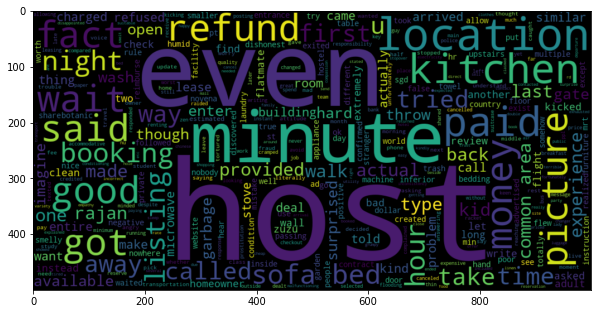

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(bad_rating['clean'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

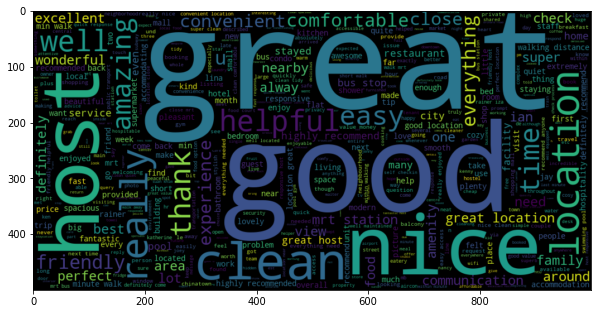

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(good_rating['clean'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

- In the reviews of the listings having rating <=2, we can see that words like host, booking, minute, wait, call, kitchen, picture, fact appear a lot. These may be complaints about the host, long wait times, or room amenities that are not as pictured. Guests also talk a lot about the location
- In the review of the listings having rating 5, adjectives such as great, nice, well, love, comfortable, helpful, friendly, great loation... and nouns such as host, communication, location, mrt station time appear a lot.

=> Therefore, I will deeply analyze the following 3 factors to see how those factors affect the rating: location, amenities and host.

### Does neighborhood affect overall rating?

In [ ]:
temp['neighbourhood_cleansed'].value_counts().head(20)

Queenstown       4
Bukit Merah      3
Clementi         2
Tanglin          2
Rochor           2
Geylang          2
Novena           1
Bishan           1
Outram           1
Lim Chu Kang     1
Downtown Core    1
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
temp_2['neighbourhood_cleansed'].value_counts().head(20)

Kallang            86
Downtown Core      53
Outram             50
Geylang            38
Novena             34
Rochor             29
Bukit Merah        26
Queenstown         23
Bedok              20
River Valley       16
Tanglin            14
Singapore River    14
Clementi           12
Jurong East        11
Jurong West         9
Orchard             8
Newton              6
Toa Payoh           4
Hougang             4
Bukit Timah         3
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
# Number of listing and average rating of each neighbourhood_cleansed
nbh = df_listing.groupby('neighbourhood_cleansed')[['id','review_scores_rating']].agg({'id':'count','review_scores_rating':'mean'}).sort_values(by='review_scores_rating').reset_index()

In [ ]:
nbh.rename(columns={'id':'number_of_listing','review_scores_rating':'average_rating'},inplace=True)
nbh.head()

,neighbourhood_cleansed,number_of_listing,average_rating
0,Lim Chu Kang,1,1.000000
1,Bishan,15,4.052667
2,Queenstown,74,4.253243
3,Choa Chu Kang,2,4.315000
4,Sembawang,4,4.360000


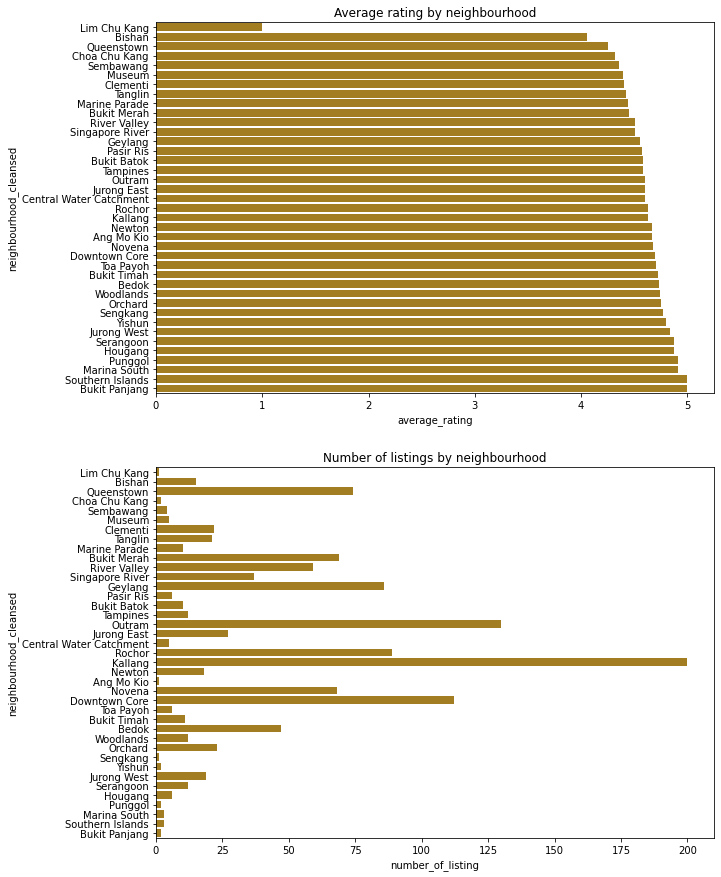

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(211)
sns.barplot(data=nbh,
            x='average_rating',
            y='neighbourhood_cleansed',
            color='darkgoldenrod')
plt.title('Average rating by neighbourhood')
plt.subplot(212)
sns.barplot(data=nbh,
            x='number_of_listing',
            y='neighbourhood_cleansed',
            color='darkgoldenrod')
plt.title('Number of listings by neighbourhood')
plt.show()


In [ ]:
df_listing.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
North-East Region    4.862273
East Region          4.690769
West Region          4.602195
Central Region       4.570895
North Region         4.500000
Name: review_scores_rating, dtype: float64

=> The rating of an region does not depend on the number of listings in that region

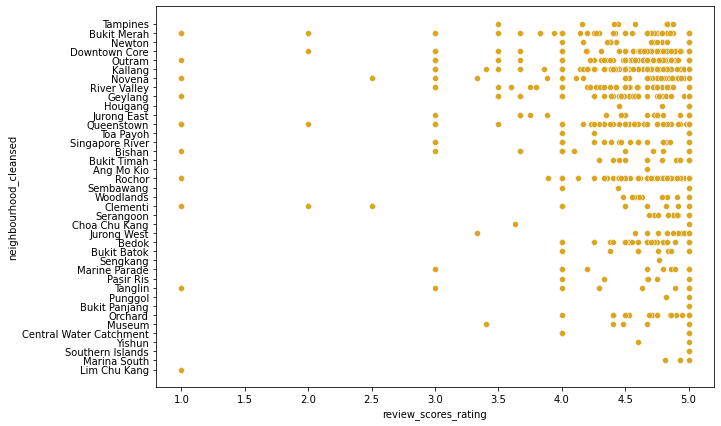

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_listing,
                x='review_scores_rating',
                y='neighbourhood_cleansed',
                color='goldenrod')

Neighborhood doesn't really affect the overal rating

### What amenities to include to get high overall rating?

In [ ]:
df_listing['amenities']

2       ["TV", "Fire pit", "Keypad", "Outdoor dining a...
3       ["TV", "Fire pit", "Keypad", "Outdoor dining a...
4       ["TV", "Fire pit", "Keypad", "Outdoor dining a...
5       ["Wifi", "TV", "Washer", "Shampoo", "Kitchen",...
6       ["Wifi", "TV", "Washer", "Dishes and silverwar...
                              ...                        
3034    ["TV", "Security cameras on property", "Safe",...
3036    ["TV", "Hot tub", "Body soap", "Shower gel", "...
3039    ["Cable TV", "Dryer", "Children\u2019s dinnerw...
3079    ["Wifi", "TV", "Washer", "Dishes and silverwar...
3083    ["Dedicated workspace", "Wifi", "TV", "Smoke a...
Name: amenities, Length: 1232, dtype: object

In [ ]:
# Function to count amenities:
def count_amenities(x):
 val = x.replace('[','').replace(']','').replace('"','').replace(' ','_').replace(',',' ')
 val = val.split()
 return len(val)

In [ ]:
df_listing['number_of_amenities'] = df_listing['amenities'].apply(count_amenities)

In [ ]:
temp['number_of_amenities'] = temp['amenities'].apply(count_amenities)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp_2['number_of_amenities'] = temp_2['amenities'].apply(count_amenities)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


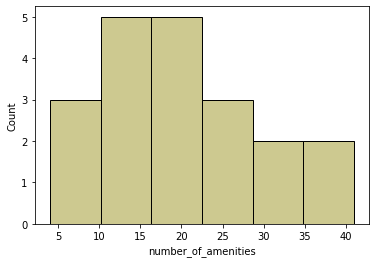

In [ ]:
sns.histplot(data=temp,
             x='number_of_amenities',
             color='darkkhaki')

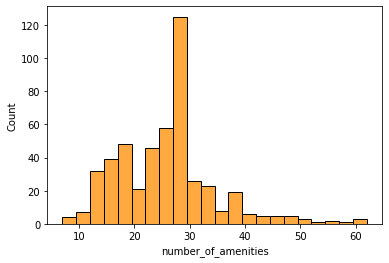

In [ ]:
sns.histplot(data=temp_2,
             x='number_of_amenities',
             color='darkorange')

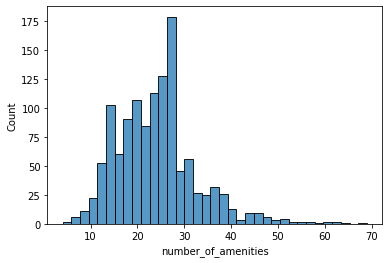

In [ ]:
sns.histplot(data=df_listing,
             x='number_of_amenities')

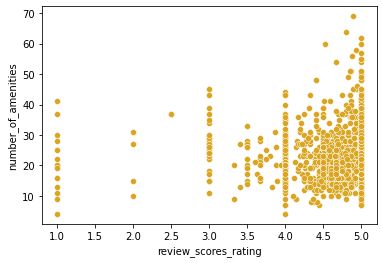

In [ ]:
sns.scatterplot(data=df_listing,
            x='review_scores_rating',
            y='number_of_amenities',
            color='goldenrod')

In [ ]:
amenities_of_br = temp['amenities'].str.strip('["').str.strip('"]').str.replace('"', '').str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(30)
amenities_of_br

Air conditioning                20
Long term stays allowed         20
Wifi                            19
Washer                          17
Iron                            15
Hangers                         15
Essentials                      15
Dryer                           14
Kitchen                         14
Hair dryer                      14
TV                              13
Hot water                       13
Fire extinguisher               12
Smoke alarm                     11
Cooking basics                   9
Lock on bedroom door             9
Shampoo                          9
Elevator                         8
Gym                              8
Refrigerator                     8
Stove                            8
Dishes and silverware            8
Bed linens                       7
Pool                             7
Microwave                        7
Private entrance                 6
Free parking on premises         6
Security cameras on property     6
Extra pillows and bl

In [ ]:
amenities_badrating = {'amenities': amenities_of_br.index,
                       'count':amenities_of_br.values}
amenities_badrating = pd.DataFrame(amenities_badrating)
amenities_badrating

,amenities,count
0,Air conditioning,20
1,Long term stays allowed,20
2,Wifi,19
3,Washer,17
4,Iron,15
5,Hangers,15
6,Essentials,15
7,Dryer,14
8,Kitchen,14
9,Hair dryer,14


In [ ]:
amenities_of_gr = temp_2['amenities'].str.strip('["').str.strip('"]').str.replace('"', '').str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(30)
amenities_of_gr

Long term stays allowed       483
Air conditioning              481
Wifi                          476
Essentials                    447
Iron                          446
Hangers                       442
Kitchen                       429
Washer                        416
Hot water                     380
Dryer                         368
Hair dryer                    353
Refrigerator                  334
Dishes and silverware         327
Microwave                     317
Bed linens                    302
Shampoo                       284
Stove                         280
Cooking basics                276
Private entrance              254
Elevator                      247
TV                            245
Lock on bedroom door          242
Smoke alarm                   238
Luggage dropoff allowed       237
Heating                       235
Pool                          223
Fire extinguisher             219
Extra pillows and blankets    195
Oven                          182
Gym           

In [ ]:
amenities_goodrating = {'amenities': amenities_of_gr.index,
                       'count':amenities_of_gr.values}
amenities_goodrating = pd.DataFrame(amenities_goodrating)
amenities_goodrating

,amenities,count
0,Long term stays allowed,483
1,Air conditioning,481
2,Wifi,476
3,Essentials,447
4,Iron,446
5,Hangers,442
6,Kitchen,429
7,Washer,416
8,Hot water,380
9,Dryer,368


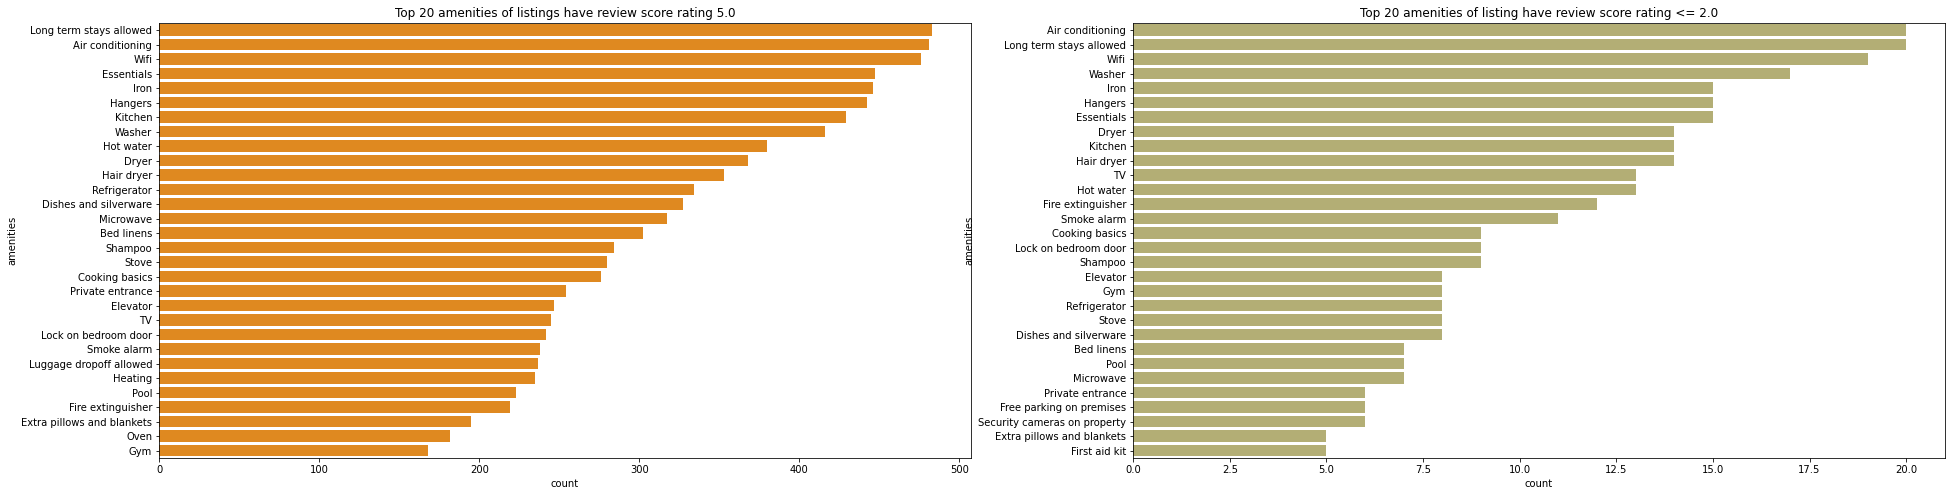

In [ ]:
plt.figure(figsize=(32,8))

plt.subplot(121)
sns.barplot(data=amenities_goodrating,
            x='count',
            y='amenities',
            color='darkorange')
plt.title('Top 20 amenities of listings have review score rating 5.0')

plt.subplot(122)
sns.barplot(data=amenities_badrating,
            x='count',
            y='amenities',
            color='darkkhaki')
plt.title('Top 20 amenities of listing have review score rating <= 2.0')
plt.show()

Top 20 amenities in the 2 groups are relatively similar, the common amenities in Singapore are Long term stays allowed, air conditioning, wifi, essentials, iron, hangers, kitchen,...
The amenities in top 20 of rating 5.0 that the amenities in top 20 of rating <=2.0 does not have : Dishes and silverware, bed linens, microwave, Cooking basics, stove.

### What is the difference about host between listings with high ratings (5.0) and those with low ratings (<=2.0)?

Host_response_rate, host_acceptance_rate

In [ ]:
# Rating <=2
temp[['host_response_rate','host_acceptance_rate']].mean()

host_response_rate      86.25
host_acceptance_rate    61.05
dtype: float64

In [ ]:
# Rating 5.0
temp_2[['host_response_rate','host_acceptance_rate']].mean()

host_response_rate      93.683778
host_acceptance_rate    77.829569
dtype: float64

Host identity verified

In [ ]:
# Rating <=2
temp['host_identity_verified'].sum()/temp['host_identity_verified'].shape[0]*100

90.0

In [ ]:
# Rating 5.0
temp_2['host_identity_verified'].sum()/temp_2['host_identity_verified'].shape[0]*100

97.1252566735113

Instant_bookable?

In [ ]:
# Rating <=2
temp['instant_bookable'].sum()/temp['instant_bookable'].shape[0]*100

45.0

In [ ]:
# Rating 5.0
temp_2['instant_bookable'].sum()/temp_2['instant_bookable'].shape[0]*100

53.182751540041075

Host is super host?

In [ ]:
# Rating <=2
temp[temp['host_is_superhost']=='t'].shape[0]/temp.shape[0]*100

5.0

Who is the host is superhost?

In [ ]:
temp[temp['host_is_superhost']=='t']

,id,listing_url,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,number_of_amenities
2998,628685069550444963,https://www.airbnb.com/rooms/628685069550444963,2 BR (For 4) Svc Apt Stevens/Orchard/UNESCO #43,6609641,within an hour,100.0,96.0,t,1,Tanglin,Central Region,1.31524,103.82785,"[""Cable TV"", ""Dryer"", ""Children\u2019s dinnerw...",1,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,37


In [ ]:
# Rating 5.0
temp_2[temp_2['host_is_superhost']=='t'].shape[0]/temp_2.shape[0]*100

31.211498973305957

There are 31.5% host is superhost in listings rated 5.0

In [ ]:
records = [('1 to 2',temp[['host_response_rate','host_acceptance_rate']].mean().values[0],temp[['host_response_rate','host_acceptance_rate']].mean().values[1],temp['host_identity_verified'].sum()/temp['host_identity_verified'].shape[0]*100,temp['instant_bookable'].sum()/temp['instant_bookable'].shape[0]*100,temp[temp['host_is_superhost']=='t'].shape[0]/temp.shape[0]*100),
           ('5',temp_2[['host_response_rate','host_acceptance_rate']].mean().values[0],temp_2[['host_response_rate','host_acceptance_rate']].mean().values[1],temp_2['host_identity_verified'].sum()/temp_2['host_identity_verified'].shape[0]*100,temp_2['instant_bookable'].sum()/temp_2['instant_bookable'].shape[0]*100,temp_2[temp_2['host_is_superhost']=='t'].shape[0]/temp_2.shape[0]*100)]
plot_data = pd.DataFrame(data=records, columns= ['rating','host_response_rate','host_acceptance_rate','host_identity_verified','instant_bookable','host_is_superhost'])
plot_data

,rating,host_response_rate,host_acceptance_rate,host_identity_verified,instant_bookable,host_is_superhost
0,1 to 2,86.250000,61.050000,90.000000,45.000000,5.000000
1,5,93.683778,77.829569,97.125257,53.182752,31.211499


In [ ]:
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  2 non-null      object 
 1   host_response_rate      2 non-null      float64
 2   host_acceptance_rate    2 non-null      float64
 3   host_identity_verified  2 non-null      float64
 4   instant_bookable        2 non-null      float64
 5   host_is_superhost       2 non-null      float64
dtypes: float64(5), object(1)
memory usage: 224.0+ bytes


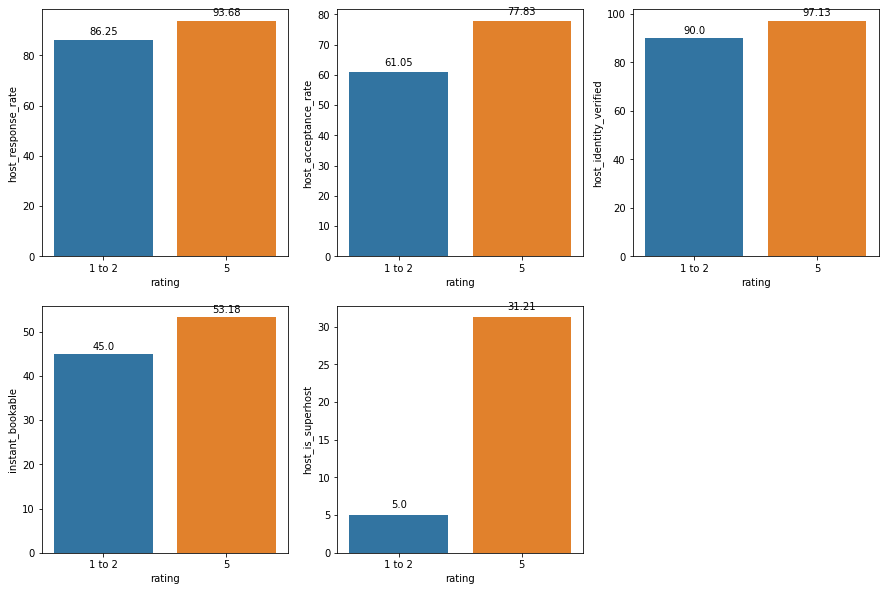

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.barplot(data=plot_data,
            x='rating',
            y='host_response_rate')
for i in range(plot_data.shape[0]):
  plt.text(x=i,
          y= plot_data.loc[i,'host_response_rate']+2,
          s = round(plot_data.loc[i,'host_response_rate'],2),
          ha='center',
)
plt.subplot(232)
sns.barplot(data=plot_data,
            x='rating',
            y='host_acceptance_rate')
for i in range(plot_data.shape[0]):
  plt.text(x=i,
          y= plot_data.loc[i,'host_acceptance_rate']+2,
          s = round(plot_data.loc[i,'host_acceptance_rate'],2),
          ha='center',
)
plt.subplot(233)
sns.barplot(data=plot_data,
            x='rating',
            y='host_identity_verified')
for i in range(plot_data.shape[0]):
  plt.text(x=i,
          y= plot_data.loc[i,'host_identity_verified']+2,
          s = round(plot_data.loc[i,'host_identity_verified'],2),
          ha='center',
)
plt.subplot(234)
sns.barplot(data=plot_data,
            x='rating',
            y='instant_bookable')
for i in range(plot_data.shape[0]):
  plt.text(x=i,
          y= plot_data.loc[i,'instant_bookable']+1,
          s = round(plot_data.loc[i,'instant_bookable'],2),
          ha='center',
)
plt.subplot(235)
sns.barplot(data=plot_data,
            x='rating',
            y='host_is_superhost')
for i in range(plot_data.shape[0]):
  plt.text(x=i,
          y= plot_data.loc[i,'host_is_superhost']+1,
          s = round(plot_data.loc[i,'host_is_superhost'],2),
          ha='center',
)
plt.show()

There are 31.5% host is superhost in listings rated 5.0

Airbnb with `review_score_rating` <= 2.0 has `host_acceptance_rate` 61.05%, 16.78% lower than airbnb with `review_score_rating` 5.0 (77.83%); `host_response_rate` 86.25%, 7.43% lower than airbnb with `review_score_rating` 5.0 (93.68%) and `host_identity_verified` 90%, 7.13% lower than airbnb with `review_score_rating` 5.0 (97.13%). Percentage of `Instant_bookable` and `host_is_superhost` in listings rated <=2 are also lower than listings rated 5.0.

- We can see that it is very important to respond to customer messages in a timely manner, this will increase customer satisfaction and help hosts get higher ratings. In addition, many potential customers may switch to other options while waiting for a host response for a long time, which can lead to loss of potential customers.

- Listings with higher host_acceptance_rate also tend to get higher overall ratings. This can be concluded that listings with high ratings are less likely to be canceled. Hosts should take note of this.

- About host_identity_verified, verified identity is an optional procedure for hosts. Hosts will get badges that say 'identity verified' on their homepage if the upload their government-issued photo ID to the Airbnb system. Listings with higher host_identity_verified also have higher overall ratings, presumably guests prefer verified host listings because that badge gives a sense of security. Therefore, it also partly affects the evaluation of guests.

- Listing rated 5.0 also have percentage of `instant_bookable` higher than listing rated <=2. Host may consider this

- The rate of superhosts in listing rated 5.0 is also higher.


### In 5 factors: communication, value, cleanliness, checkin, location, which factors matters to get a high overall rating?

In [ ]:
full_rating_1 = {'review_type':temp[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean().sort_values().index,
                 'rating':temp[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean().sort_values().values}
full_rating_1 = pd.DataFrame(full_rating_1)
full_rating_1

,review_type,rating
0,review_scores_accuracy,1.50
1,review_scores_communication,1.60
2,review_scores_value,1.80
3,review_scores_cleanliness,2.20
4,review_scores_checkin,2.35
5,review_scores_location,2.95


In [ ]:
full_rating_5 = {'review_type':temp_2[['review_scores_accuracy','review_scores_communication','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location']].mean().index,
                 'rating':temp_2[['review_scores_accuracy','review_scores_communication','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location']].mean().values}
full_rating_5 = pd.DataFrame(full_rating_5)
full_rating_5

,review_type,rating
0,review_scores_accuracy,4.909713
1,review_scores_communication,4.947064
2,review_scores_value,4.744025
3,review_scores_cleanliness,4.796838
4,review_scores_checkin,4.940370
5,review_scores_location,4.891643


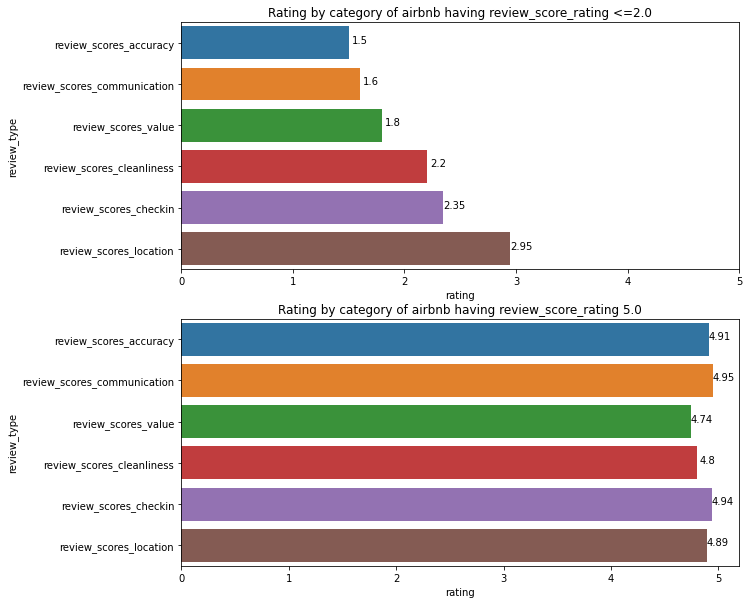

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(211)
sns.barplot(data=full_rating_1,
            x='rating',
            y='review_type')
plt.xlim([0,5])
for i in range (full_rating_1.shape[0]):
  plt.text(y=i,
           x=full_rating_1.loc[i,'rating']+0.1,
           s=round(full_rating_1.loc[i,'rating'],2),
           ha='center')
plt.title('Rating by category of airbnb having review_score_rating <=2.0')
plt.subplot(212)
sns.barplot(data=full_rating_5,
            x='rating',
            y='review_type',
            order=['review_scores_accuracy','review_scores_communication','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location'])
for i in range (full_rating_5.shape[0]):
  plt.text(y=i,
           x=full_rating_5.loc[i,'rating']+0.1,
           s=round(full_rating_5.loc[i,'rating'],2),
           ha='center')
plt.title('Rating by category of airbnb having review_score_rating 5.0')
plt.show()

We can see that the `review_scores_communication` is highest in evaluating the rating of the apartments 5.0. Therefore, communication between host and guest is the most important factor to get a rating of 5.0. Let us compare how different factors affect overall ratings:

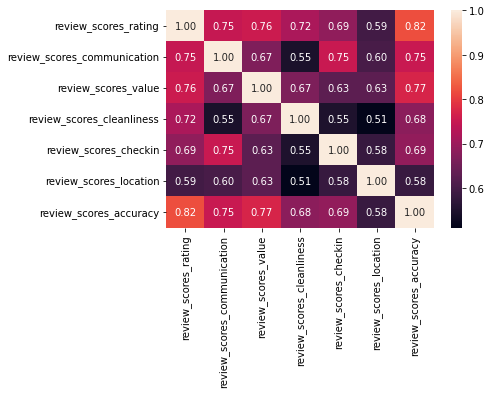

In [ ]:
num = df_listing[['review_scores_rating','review_scores_communication','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location','review_scores_accuracy']]
sns.heatmap(data=num.corr(), annot=True, fmt='.2f');

This is a bit of an unexpected result! Review_scores_accuracy seems to have the most correlation with review score rating, followed by review_score_value and review_score_communication.
- Perhaps the fact that the listing is received incorrectly, not as described, makes guests extremely disappointed, feels that the listing does not meet the value they expect for the price paid and this makes them tend to underrated for that listing
- Cleanliness is also an equally important factor to help the listing have a high rating, avoiding low rating
- Besides, the evaluation of communication also has a high relationship with the review score rating. Host in Singapore (maybe elsewhere too) needs to be responsive and friendly because good communication tends to get a high overall rating. Good communication also directly impacts the check-in rating.

### How should the host communicate?

How long should the host reply to the message?

In [ ]:
# Response time of Rating <=2
response_time_1 = temp['host_response_time'].value_counts().reset_index()
response_time_1

,index,host_response_time
0,within a few hours,8
1,within an hour,8
2,within a day,3
3,a few days or more,1


In [ ]:
response_time_1.rename(columns={'index':'host_response_time','host_response_time':'count'},inplace=True)
response_time_1

,host_response_time,count
0,within a few hours,8
1,within an hour,8
2,within a day,3
3,a few days or more,1


In [ ]:
response_time_1['ratio'] = response_time_1['count']/response_time_1['count'].sum()*100
response_time_1

,host_response_time,count,ratio
0,within a few hours,8,40.0
1,within an hour,8,40.0
2,within a day,3,15.0
3,a few days or more,1,5.0


In [ ]:
# Response time of Rating 5.0
response_time_2 = temp_2['host_response_time'].value_counts().reset_index()
response_time_2

,index,host_response_time
0,within a few hours,261
1,within an hour,179
2,within a day,38
3,a few days or more,9


In [ ]:
response_time_2.rename(columns={'index':'host_response_time','host_response_time':'count'},inplace=True)
response_time_2

,host_response_time,count
0,within a few hours,261
1,within an hour,179
2,within a day,38
3,a few days or more,9


In [ ]:
response_time_2['ratio'] = response_time_2['count']/response_time_2['count'].sum()*100
response_time_2

,host_response_time,count,ratio
0,within a few hours,261,53.593429
1,within an hour,179,36.755647
2,within a day,38,7.802875
3,a few days or more,9,1.848049


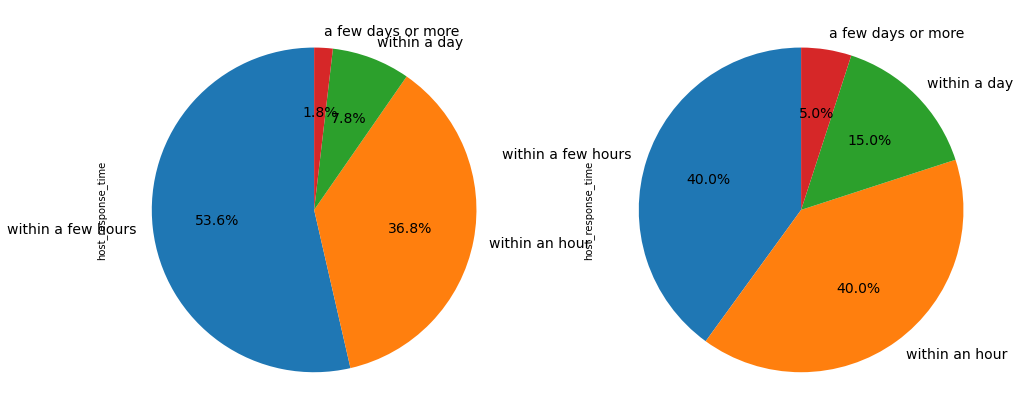

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
temp_2['host_response_time'].value_counts(normalize=True).reset_index().plot(kind='pie', y = 'host_response_time', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=temp_2['host_response_time'].value_counts(normalize=True).reset_index()['index'], legend = False, fontsize=14)
ax2 = plt.subplot(122, aspect='equal')
temp['host_response_time'].value_counts(normalize=True).reset_index().plot(kind='pie', y = 'host_response_time', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=temp['host_response_time'].value_counts(normalize=True).reset_index()['index'], legend = False, fontsize=14)

The host should reply to the message within 1 hour or within a few hours, it is best to reply within 1 hour. Response within a day or a few dáy or more tend to have a low rating

- Refer more about communicating with guests here: https://www.airbnb.com/resources/hosting-homes/a/how-and-when-to-communicate-with-guests-33?_set_bev_on_new_domain=1657538771_ZWMwYzgxZTkyOWUy&locale=en

## 3. CONCLUSION : How to get high rating?

1. Which neighbourhood to rent does not matter, but should choose a location near mrt
2. Host should: increase acceptance rate, respond to messages quickly and promptly (within an hour or a few hours), identity verified done, turn on instant bookable mode.
3. Amenities should be in the range of 25-30, add amenities such as: luggage dropoff allowed, heating, oven.  Need to provide room and amenities as described on the website
4. Improve communication efficiency with guests, communicate at the right time and in the right way
5. Clean the room before guests arrive and regularly maintain and repair damaged items in the room

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
import numpy as np
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax 
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('data_airbnb_final') 

In [ ]:
df_listing.head()

,id,listing_url,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,number_of_amenities
2,71609,https://www.airbnb.com/rooms/71609,Ensuite Room (Room 1 & 2) near EXPO,367042,within an hour,100.0,100.0,f,1,Tampines,East Region,1.34537,103.95887,"[""TV"", ""Fire pit"", ""Keypad"", ""Outdoor dining a...",20,4.44,4.37,4.00,4.63,4.78,4.26,4.32,0,31
3,71896,https://www.airbnb.com/rooms/71896,B&B Room 1 near Airport & EXPO,367042,within an hour,100.0,100.0,f,1,Tampines,East Region,1.34754,103.95958,"[""TV"", ""Fire pit"", ""Keypad"", ""Outdoor dining a...",24,4.16,4.22,4.09,4.43,4.43,4.17,4.04,1,28
4,71903,https://www.airbnb.com/rooms/71903,Room 2-near Airport & EXPO,367042,within an hour,100.0,100.0,f,1,Tampines,East Region,1.34531,103.96100,"[""TV"", ""Fire pit"", ""Keypad"", ""Outdoor dining a...",47,4.41,4.39,4.52,4.63,4.64,4.50,4.36,0,23
5,275343,https://www.airbnb.com/rooms/275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",1439258,within a few hours,95.0,86.0,f,1,Bukit Merah,Central Region,1.29015,103.80814,"[""Wifi"", ""TV"", ""Washer"", ""Shampoo"", ""Kitchen"",...",21,4.42,4.17,4.28,4.56,4.50,4.56,4.61,0,14
6,275344,https://www.airbnb.com/rooms/275344,15 mins to Outram MRT Single Room (B),1439258,within a few hours,95.0,86.0,f,1,Bukit Merah,Central Region,1.28836,103.81144,"[""Wifi"", ""TV"", ""Washer"", ""Dishes and silverwar...",13,4.55,4.67,4.25,4.67,4.58,4.58,4.50,0,15


In [ ]:
nbh.head()

,neighbourhood_cleansed,number_of_listing,average_rating
0,Lim Chu Kang,1,1.000000
1,Bishan,15,4.052667
2,Queenstown,74,4.253243
3,Choa Chu Kang,2,4.315000
4,Sembawang,4,4.360000


In [ ]:
amenities_badrating.head()

,amenities,count
0,Air conditioning,20
1,Long term stays allowed,20
2,Wifi,19
3,Washer,17
4,Iron,15


In [ ]:
amenities_goodrating.head()

,amenities,count
0,Long term stays allowed,483
1,Air conditioning,481
2,Wifi,476
3,Essentials,447
4,Iron,446


In [ ]:
plot_data.head()

,rating,host_response_rate,host_acceptance_rate,host_identity_verified,instant_bookable,host_is_superhost
0,1 to 2,86.250000,61.050000,90.000000,45.000000,5.000000
1,5,93.683778,77.829569,97.125257,53.182752,31.211499


In [ ]:
full_rating_1.head()

,review_type,rating
0,review_scores_accuracy,1.50
1,review_scores_communication,1.60
2,review_scores_value,1.80
3,review_scores_cleanliness,2.20
4,review_scores_checkin,2.35


In [ ]:
full_rating_5.head()

,review_type,rating
0,review_scores_accuracy,4.909713
1,review_scores_communication,4.947064
2,review_scores_value,4.744025
3,review_scores_cleanliness,4.796838
4,review_scores_checkin,4.940370


In [ ]:
response_time_1.head()

,host_response_time,count,ratio
0,within a few hours,8,40.0
1,within an hour,8,40.0
2,within a day,3,15.0
3,a few days or more,1,5.0


In [ ]:
response_time_2.head()

,host_response_time,count,ratio
0,within a few hours,261,53.593429
1,within an hour,179,36.755647
2,within a day,38,7.802875
3,a few days or more,9,1.848049


In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key

export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'listing', df_listing)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'listingByNeighborood', nbh)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'amenitiesOfBr', amenities_badrating)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'amenitiesOfGr', amenities_goodrating)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'hostRate', plot_data)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'fullRating2', full_rating_1)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'fullRating5', full_rating_5)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'responseTime2', response_time_1)
export_data_to_new_sheet('1xhXz58nnD_u0fUJ7RBBEDL6Pyph5sx2-yaCS-LLPn9M', 'responseTime5', response_time_2)